In [2]:
import pandas as pd

members_df = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv')
books_df = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv')
events_df = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv')


C:\Users\dittm\AppData\Local\Temp\ipykernel_19420\860902723.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  events_df = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv')


members

In [3]:
total_members = len(members_df)
print('%d members' % len(members_df))

5235 members


In [4]:
def percent_known(df, field):
  total = len(df)
  with_field = len(members_df[members_df[field].notnull()])
  print('%d with %s : %.00f%%' % (with_field, field, (with_field/total)*100))
  return with_field

In [5]:
total_known = {}
for field in ['title', 'gender', 'birth_year', 'death_year', 'nationalities', 'viaf_url', 'wikipedia_url']:
    total_known[field] = percent_known(members_df, field)

print(total_known)

3673 with title : 70%
4039 with gender : 77%
561 with birth_year : 11%
544 with death_year : 10%
581 with nationalities : 11%
520 with viaf_url : 10%
358 with wikipedia_url : 7%
{'title': 3673, 'gender': 4039, 'birth_year': 561, 'death_year': 544, 'nationalities': 581, 'viaf_url': 520, 'wikipedia_url': 358}


In [6]:
known = pd.DataFrame({'total': total_known})
known['percent'] = (known['total'] / len(members_df))*100
known = known.sort_values(by=['total'], ascending=False)
known.percent = known.percent.round(2)
known

,total,percent
gender,4039,77.15
title,3673,70.16
nationalities,581,11.10
birth_year,561,10.72
death_year,544,10.39
viaf_url,520,9.93
wikipedia_url,358,6.84


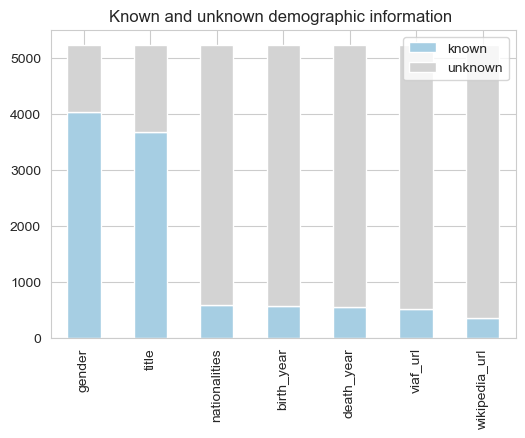

In [23]:
import matplotlib
total_members = len(members_df.index)
known_unknown = pd.DataFrame()
known_unknown['known'] = known['total']

known_unknown['unknown'] = known.total.apply(lambda x: total_members - x)

known_unknown.plot(kind='bar', title='Known and unknown demographic information ', stacked=True, color=['#a6cee3', 'lightgray'], figsize=(6,4))
matplotlib.pyplot.savefig('known_unknown_demographics.svg')

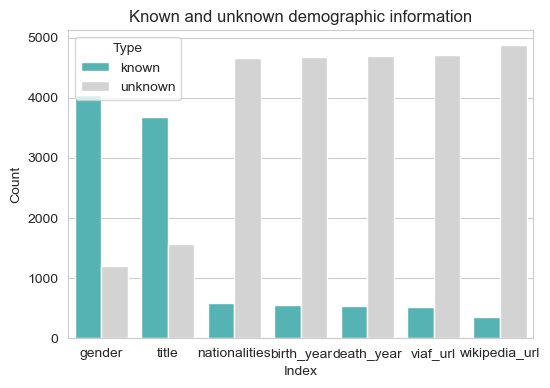

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your members_df and known dataframe already defined
total_members = len(members_df.index)
known_unknown = pd.DataFrame()
known_unknown['known'] = known['total']
known_unknown['unknown'] = known['total'].apply(lambda x: total_members - x)

# Reshape the DataFrame for Seaborn
known_unknown_reset = known_unknown.reset_index()
known_unknown_melted = known_unknown_reset.melt(id_vars='index', value_vars=['known', 'unknown'], var_name='Type', value_name='Count')

# Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(data=known_unknown_melted, x='index', y='Count', hue='Type', palette=['#47C2C2', 'lightgray'])
plt.title('Known and unknown demographic information')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend(title='Type')
plt.savefig('known_unknown_demographics.svg')
plt.show()

In [9]:
unknown = members_df
for field in ['title', 'gender', 'birth_year', 'death_year', 'nationalities', 'viaf_url', 'wikipedia_url']:
  unknown = unknown[unknown[field].isnull()]

print(f'{len(unknown):,} members with no demographic info')
unknown

1,183 members with no demographic info


,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
2,https://shakespeareandco.princeton.edu/members...,Abdul,Abdul,NaN,NaN,False,False,NaN,NaN,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-22T01:57:37+00:00
4,https://shakespeareandco.princeton.edu/members...,Abelin,Abelin,NaN,NaN,False,False,NaN,NaN,1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-22T01:57:48+00:00
8,https://shakespeareandco.princeton.edu/members...,L. C. Abrahams,"Abrahams, L. C.",NaN,NaN,False,False,NaN,NaN,1937,NaN,NaN,NaN,"Hôtel du Luxembourg, 12 rue Royer-Collard, Paris",75005,5,"48.84586, 2.34182","The Shakespeare and Company <a href=""https://s...",2021-08-15T00:40:29+00:00
11,https://shakespeareandco.princeton.edu/members...,Accursi,Accursi,NaN,NaN,False,False,NaN,NaN,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-22T01:58:25+00:00
12,https://shakespeareandco.princeton.edu/members...,Achenbach,Achenbach,NaN,NaN,False,False,NaN,NaN,1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-22T15:22:26.589958+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,https://shakespeareandco.princeton.edu/members...,Young,Young,NaN,NaN,False,False,NaN,NaN,1929;1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:39+00:00
5211,https://shakespeareandco.princeton.edu/members...,Young,Young,NaN,NaN,False,False,NaN,NaN,1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:39+00:00
5212,https://shakespeareandco.princeton.edu/members...,Young,Young,NaN,NaN,False,False,NaN,NaN,1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:39+00:00
5222,https://shakespeareandco.princeton.edu/members...,Zakorska,Zakorska,NaN,NaN,False,False,NaN,NaN,1927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:39+00:00


membership years

In [10]:
no_membership_years = members_df[members_df['membership_years'].isnull()]
print('%d members with no membership years' % len(no_membership_years))
no_membership_years

58 members with no membership years


,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
101,https://shakespeareandco.princeton.edu/members...,Louis Aragon,"Aragon, Louis",NaN,Male,False,True,1897.0,1982.0,NaN,http://viaf.org/viaf/8178518,http://en.wikipedia.org/wiki/Louis_Aragon,France,"12 rue Saint-Pierre, Neuilly-sur-Seine",92200,NaN,"48.88241, 2.27120",NaN,2020-12-28T15:46:16+00:00
136,https://shakespeareandco.princeton.edu/members...,Louis Atlas,"Atlas, Louis",NaN,Male,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"16 rue Jacques Callot, Paris",75006,6,"48.85536, 2.33694",According to the Shakespeare and Company [addr...,2021-09-23T12:11:31.262776+00:00
152,https://shakespeareandco.princeton.edu/members...,Jacob Auslander,"Auslander, Jacob",Mr.,Male,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"244 boulevard Raspail, Paris",75014,14,"48.83832, 2.33068","The Shakespeare and Company <a href=""https://s...",2021-10-28T17:47:21.441317+00:00
210,https://shakespeareandco.princeton.edu/members...,Mme Baquis,"Baquis, Mme",Mme,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"Hôtel l'Aiglon, 232 boulevard Raspail, Paris",75014,14,"48.83966, 2.33008","The Shakespeare and Company <a href=""https://s...",2021-08-15T01:50:35+00:00
215,https://shakespeareandco.princeton.edu/members...,Jean Barbier,"Barbier, Jean",M.,Male,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"École Polytechnique, 5 rue Descartes, Paris",75005,5,"48.84716, 2.34874","The Shakespeare and Company <a href=""https://s...",2021-11-22T13:16:42.333372+00:00
371,https://shakespeareandco.princeton.edu/members...,Miss Best,"Best, Miss",Miss,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"125 avenue des Champs-Élysées, Paris",75008,8,"48.87251, 2.29788","The Shakespeare and Company <a href=""https://s...",2021-10-28T13:12:01.090477+00:00
392,https://shakespeareandco.princeton.edu/members...,Hans Bieler,"Bieler, Hans",Dr.,Male,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"Crystal Hotel Paris, 24 rue Saint-Benoît, Paris",75006,6,"48.85445, 2.33271","The Shakespeare and Company <a href=""https://s...",2021-08-02T01:31:28+00:00
501,https://shakespeareandco.princeton.edu/members...,Mlle Boscq,"Boscq, Mlle",Mlle,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"Lycée de jeunes filles, 6 rue Bourg les Bourgs...",29000,NaN,"47.99391, -4.11150","The Shakespeare and Company <a href=""https://s...",2021-07-27T00:13:44+00:00
604,https://shakespeareandco.princeton.edu/members...,Catherine Brody,"Brody, Catherine",Miss,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"9 rue de la Grande Chaumière, Paris",75006,6,"48.84226, 2.33080","The Shakespeare and Company <a href=""https://s...",2021-07-28T18:06:55+00:00
632,https://shakespeareandco.princeton.edu/members...,Colette Brull-Ulmann / Mlle Colette Brull,"Brull-Ulmann, Colette",Mlle,Female,False,True,1920.0,NaN,NaN,http://viaf.org/viaf/166152138619610981032/,https://fr.wikipedia.org/wiki/Colette_Brull-Ul...,France,"1 avenue du Général Maistre, Paris",75014,14,"48.82538, 2.31392",NaN,2021-02-28T13:54:56+00:00


In [11]:
# recalculate active members using month range and unique member URIs
from dateutil.relativedelta import relativedelta

# regenerate month range; create a dataframe instead of a list
month_range = pd.DataFrame(data={'month_start': pd.date_range('1919-11-01','1942-09-01', freq='MS')})
one_month = relativedelta(months=1)
# use relative delta to calculate one month — this is the start of the next month and should be considered the outer bound of the range
month_range['month_end'] = month_range.month_start.apply(lambda x: x + one_month)
month_range

,month_start,month_end
0,1919-11-01,1919-12-01
1,1919-12-01,1920-01-01
2,1920-01-01,1920-02-01
3,1920-02-01,1920-03-01
4,1920-03-01,1920-04-01
...,...,...
270,1942-05-01,1942-06-01
271,1942-06-01,1942-07-01
272,1942-07-01,1942-08-01
273,1942-08-01,1942-09-01


In [12]:
subscription_events = events_df[events_df['event_type'].isin(['Subscription', 'Renewal', 'Supplement'])].copy()
subscription_events['start_date_dt'] = pd.to_datetime(subscription_events.start_date, errors='coerce')
subscription_events['end_date_dt'] = pd.to_datetime(subscription_events.end_date, errors='coerce')

In [13]:
subscription_events['end_date_dt']

1              NaT
4              NaT
6       1923-01-01
7              NaT
9              NaT
           ...    
35115   1941-12-24
35116   1942-01-04
35118   1942-03-08
35119   1942-01-09
35337          NaT
Name: end_date_dt, Length: 9828, dtype: datetime64[ns]

In [14]:
subscription_events['start_date_dt']

1       1921-01-01
4       1922-01-01
6       1923-01-01
7       1923-01-01
9       1923-01-01
           ...    
35115   1941-11-24
35116   1941-12-04
35118   1941-12-08
35119   1941-12-09
35337          NaT
Name: start_date_dt, Length: 9828, dtype: datetime64[ns]

In [15]:
def active_membership(d, df_t):
    # find all subscription events that overlap with the month
    # any overlap = subscription starts before month ends AND subscription ends after month starts
    active_subs = df_t[(df_t.start_date_dt <= d.month_end) & (df_t.end_date_dt >= d.month_start)]
    # return number of unique member ids
    return len(active_subs.member_uris.unique())

# generate a new frame with our month ranges and calculate
# - total number of active members/accounts for each month
active_member_df = month_range.copy()
active_member_df['total'] = active_member_df.apply(active_membership, axis=1, args=(subscription_events,))
#active_member_df['with_card'] = active_member_df.apply(borrowers_active_membership, axis=1, args=(subscription_events_cardinfo,))

active_member_df

,month_start,month_end,total
0,1919-11-01,1919-12-01,27
1,1919-12-01,1920-01-01,54
2,1920-01-01,1920-02-01,73
3,1920-02-01,1920-03-01,84
4,1920-03-01,1920-04-01,90
...,...,...,...
270,1942-05-01,1942-06-01,5
271,1942-06-01,1942-07-01,2
272,1942-07-01,1942-08-01,1
273,1942-08-01,1942-09-01,1


C:\Users\dittm\AppData\Local\Temp\ipykernel_19420\997076364.py:15: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  plt.grid(axis='x', color='0.95', data=(gridline, 0))


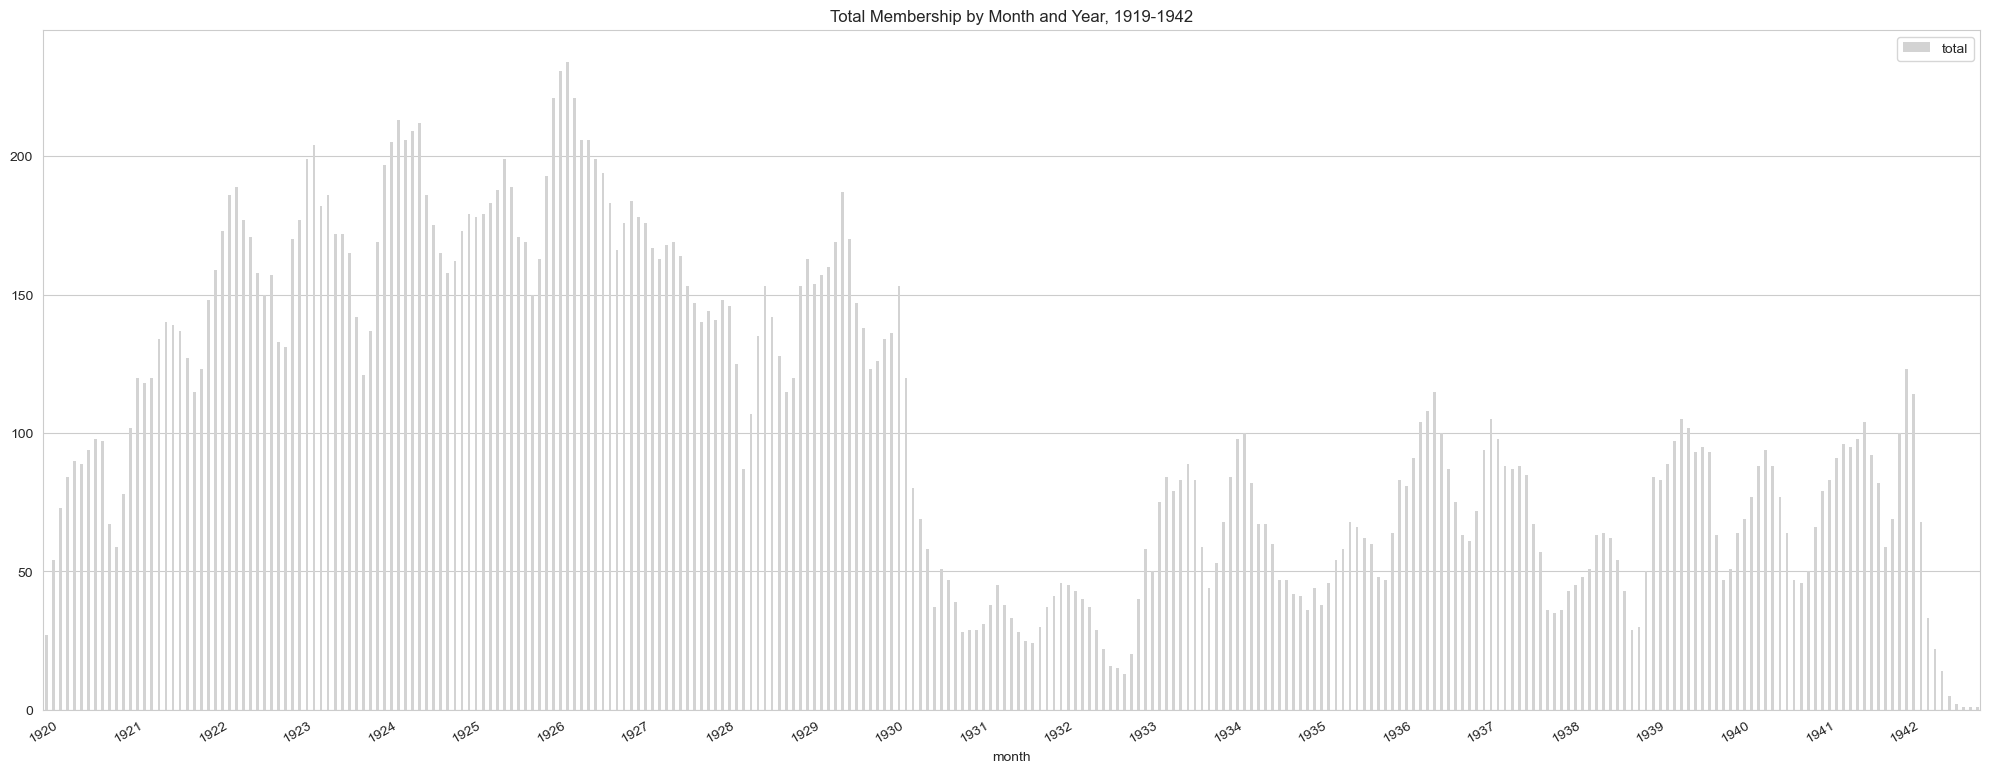

In [16]:
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

active_member_df['month'] = pd.to_datetime(active_member_df.month_start)
ax = active_member_df.plot.bar(x='month', y='total', figsize=(25,10), title='Total Membership by Month and Year, 1919-1942', color="lightgray", width=0.4, linewidth=0)

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = active_member_df.month.apply(lambda x: x.strftime('%Y') if x.month == 1 else '')
gridline = active_member_df.month.apply(lambda x: 1 if x.month == 1 else 0)


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.grid(axis='x', color='0.95', data=(gridline, 0))

plt.show()
ax.figure.savefig('membership_month_year.png')

# Define the date format
# date_form = DateFormatter("%Y")
# plot.xaxis.set_major_formatter(date_form)
# plot.show()

In [17]:
active_member_df

,month_start,month_end,total,month
0,1919-11-01,1919-12-01,27,1919-11-01
1,1919-12-01,1920-01-01,54,1919-12-01
2,1920-01-01,1920-02-01,73,1920-01-01
3,1920-02-01,1920-03-01,84,1920-02-01
4,1920-03-01,1920-04-01,90,1920-03-01
...,...,...,...,...
270,1942-05-01,1942-06-01,5,1942-05-01
271,1942-06-01,1942-07-01,2,1942-06-01
272,1942-07-01,1942-08-01,1,1942-07-01
273,1942-08-01,1942-09-01,1,1942-08-01
